# Cluster Analysis

Customer segmentation is a crucial step in understanding the unique characteristics and behaviors of different groups within a customer base. In this project, clustering was performed using **Principal Component Analysis (PCA)** for dimensionality reduction and **KMeans** for grouping customers into clusters. The resulting segmentation aims to uncover patterns and insights that can inform targeted strategies and decision-making.

This phase focuses on analyzing the clusters to understand their distinct features and distributions. By exploring the characteristics that define each group and differentiate them from others, we aim to:

- Identify key attributes that influence the formation of clusters.
- Interpret the patterns and preferences within each segment.
- Highlight differences across clusters to provide actionable insights.

The findings from this analysis will serve as a foundation for strategic business decisions, such as personalized marketing, product recommendations, and resource allocation.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv

%run ../customer_personality_analysis/utils/pandas_explorer.py

In [5]:
path = '../customer_personality_analysis/data/clustered.csv'
df = pd.read_csv(path)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,YearJoining,QuarterJoining,Kmeans_labels
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,2012,3,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,2014,1,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,2013,3,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,2014,1,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,2014,1,1


## Separating clusters into diferent datasets

In [6]:
cluster_0 = df[df['Kmeans_labels'] == 0]
cluster_1 = df[df['Kmeans_labels'] == 1]
cluster_2 = df[df['Kmeans_labels'] == 2]
cluster_3 = df[df['Kmeans_labels'] == 3]

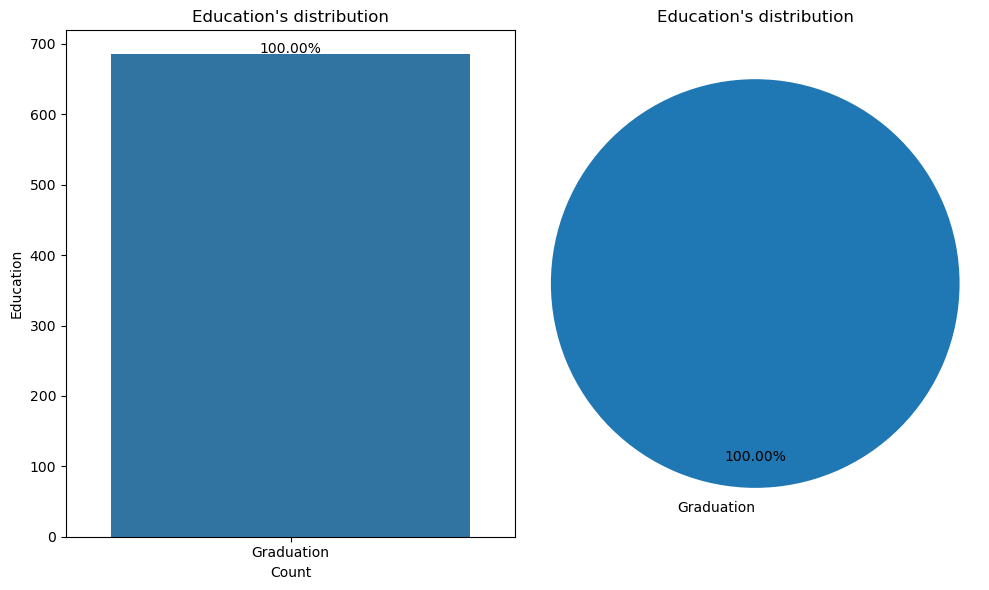

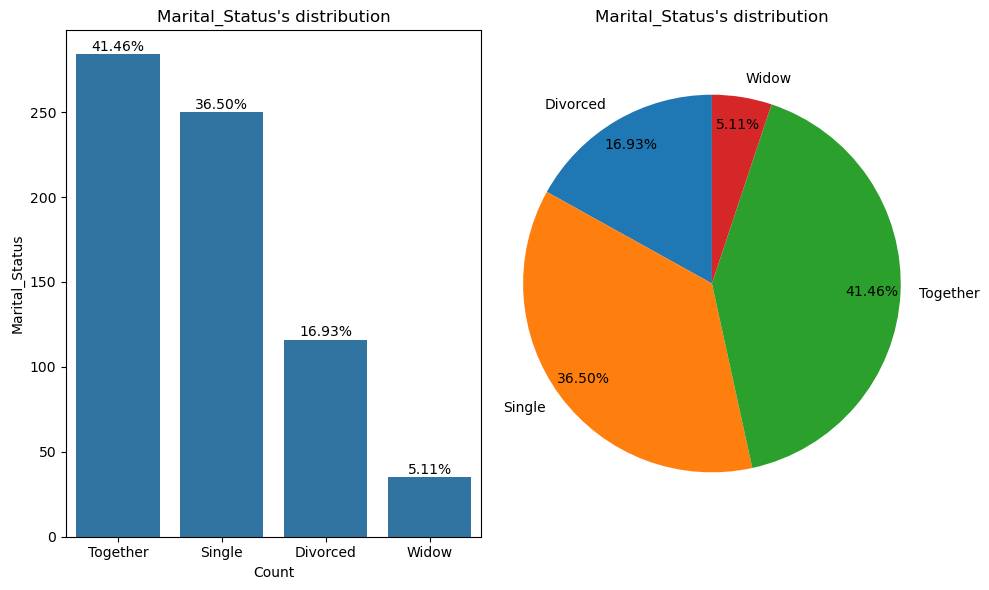

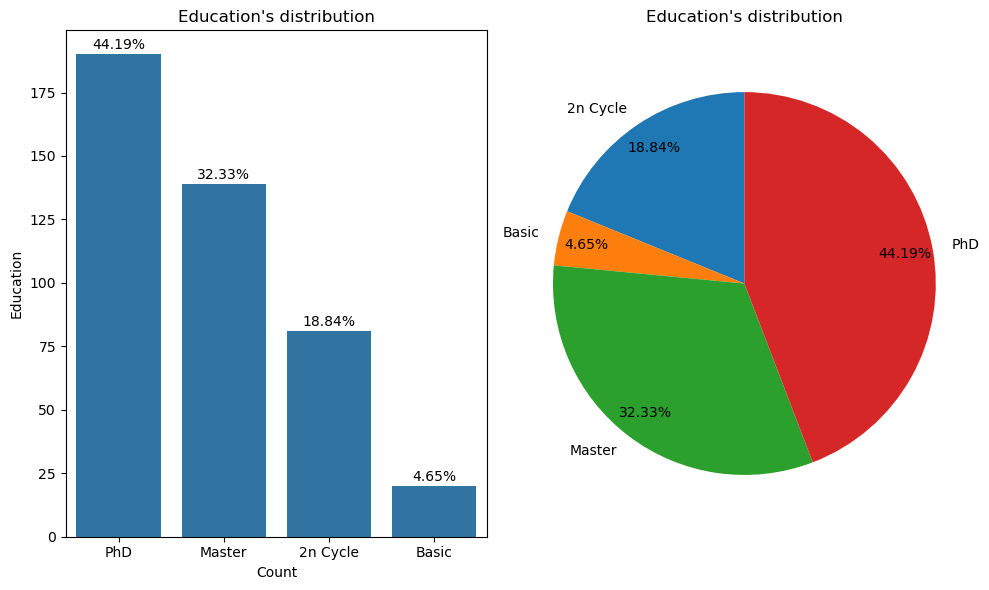

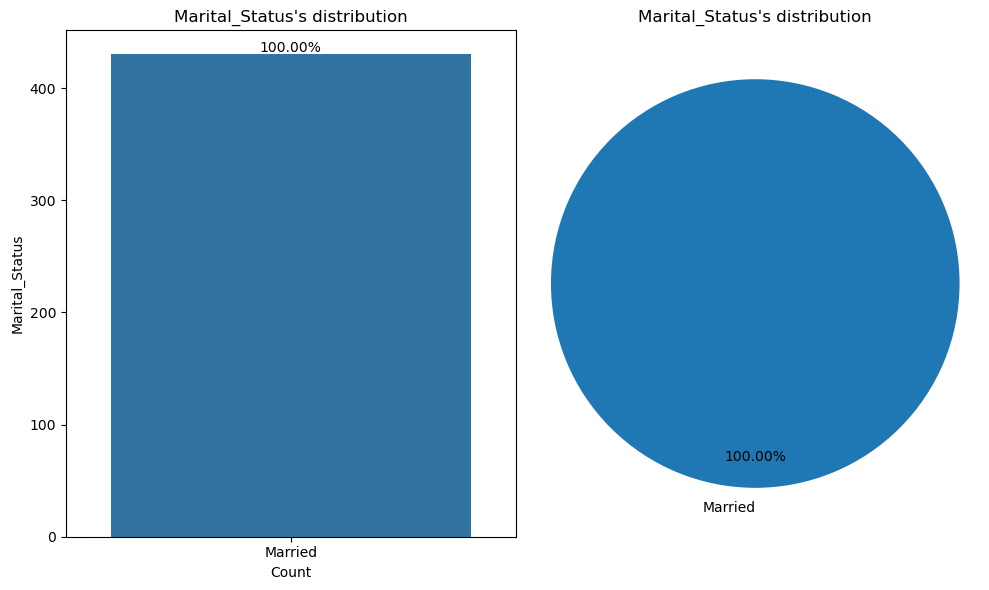

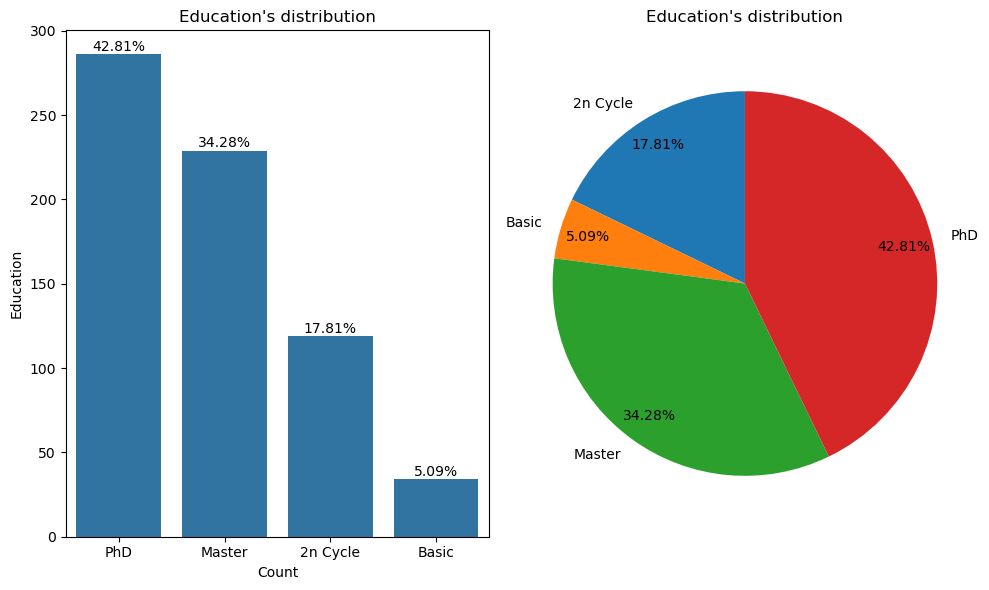

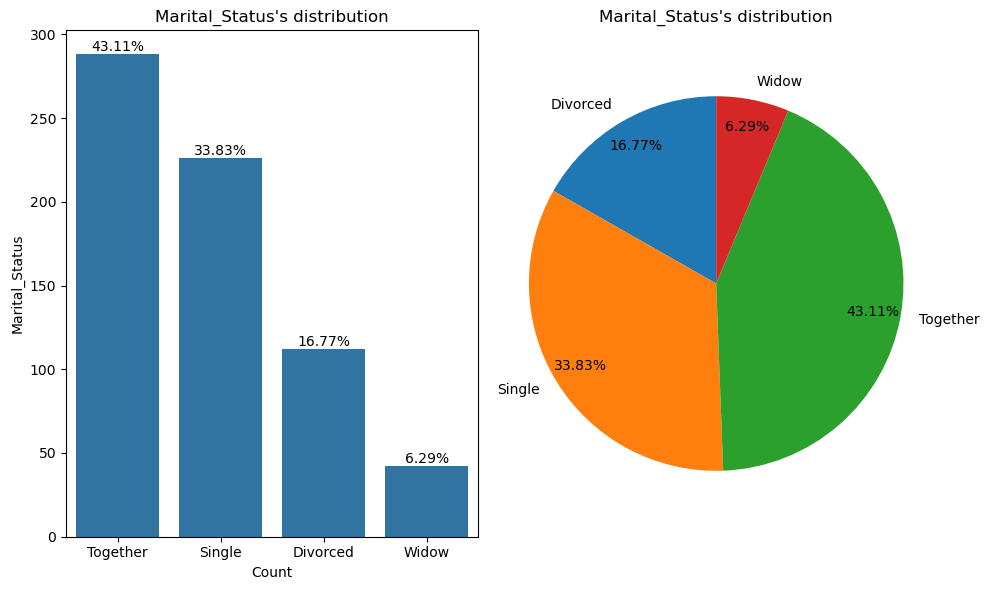

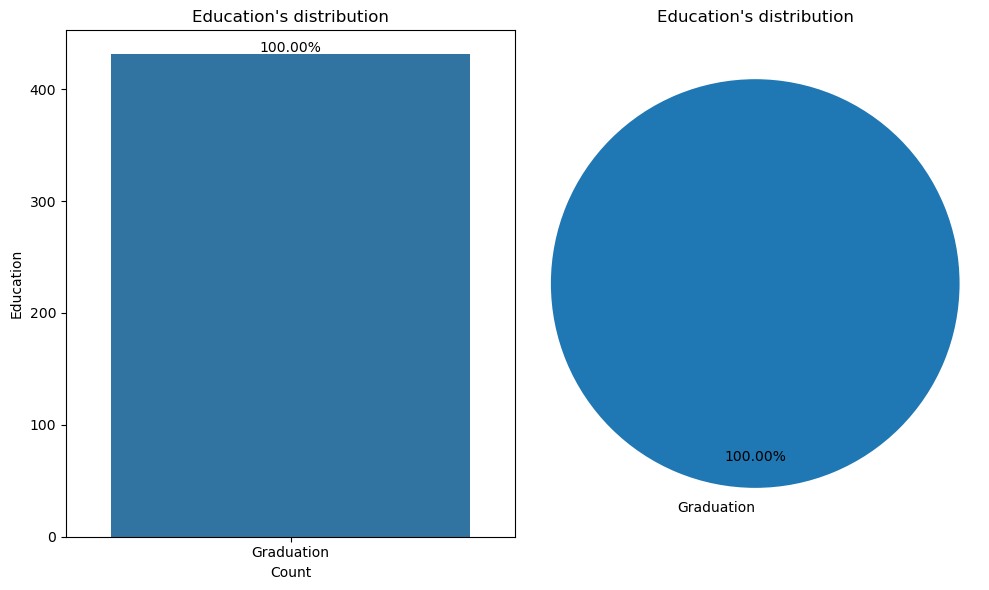

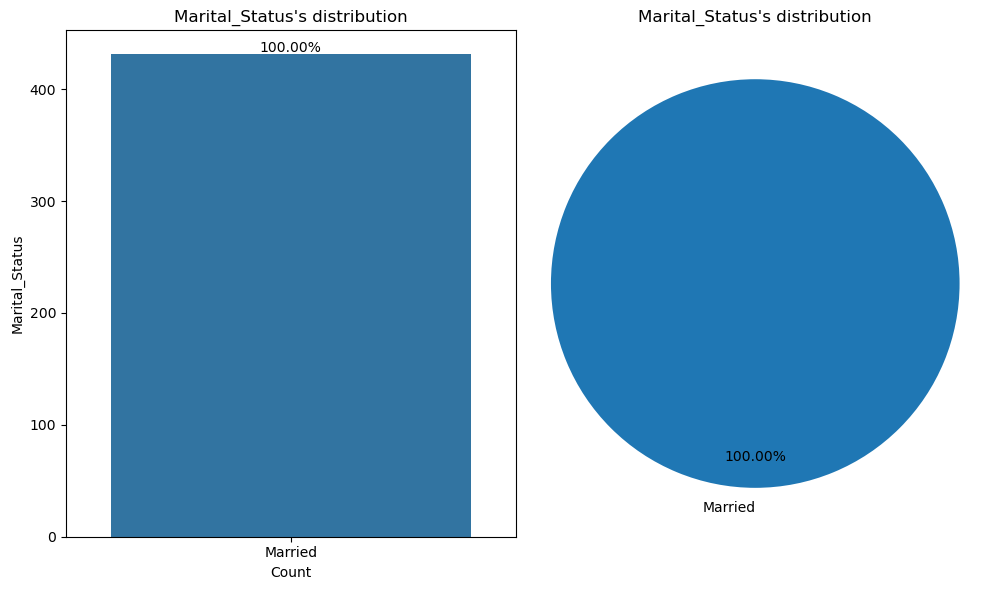

In [31]:
cat_features = df.select_dtypes(include='object').columns
clusters = df['Kmeans_labels'].sort_values().unique()
for cluster in list(range(4)):
    for col in cat_features:
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        df[df['Kmeans_labels'] == cluster].explorer.categorical_dist(col)
        plt.subplot(1,2,2)
        df[df['Kmeans_labels'] == cluster].explorer.dist_pieplot(col)
        plt.show()


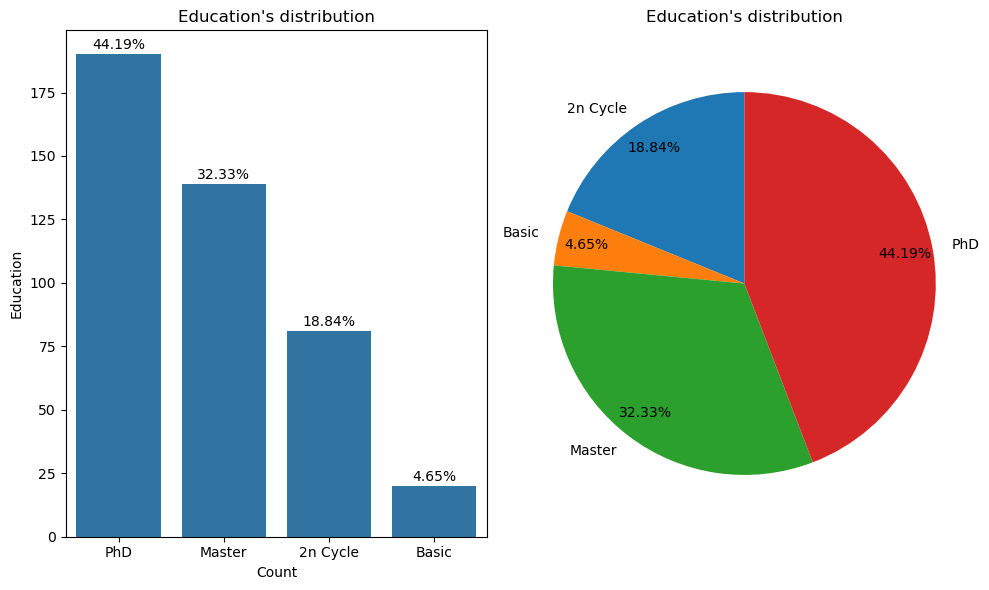

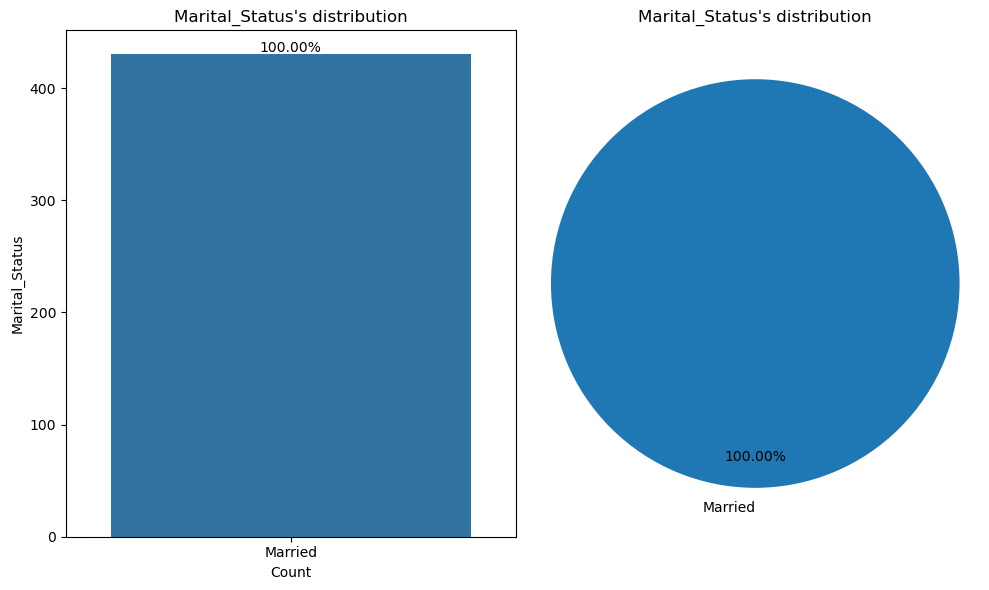

In [28]:

for col in cat_features:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    cluster_1.explorer.categorical_dist(col)
    plt.subplot(1,2,2)
    cluster_1.explorer.dist_pieplot(col)
    plt.show()

In [27]:
df.groupby('Kmeans_labels').value_counts().to_frame().head(35)

count
Kmeans_labels Year_Birth Education  Marital_Status Income  Kidhome Teenhome Recency MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds NumDealsPurchases NumWebPurchases NumCatalogPurchases NumStorePurchases NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain Response YearJoining QuarterJoining       
0             1952       Graduation Together       83844.0 0       0        57      901      31        345             75              31               191          1                 4               4                   11                1                 0            0            1            0            0            0        0        2013        2                   3
              1946       Graduation Together       37760.0 0       0        20      84       5         38              150             12               28           2                 4               1                   6                 7                 0            0            0            0            0            0        0        2012        3                   2
              1950       Graduation Together       34026.0 1       1        11      18       6         15              12              8                17           3                 2               1                   3                 5                 0            0            0            0            0            0        0        2013        3                   2
              1951       Graduation Together       40689.0 0       1        69      270      3         27              39              6                99           7                 7               1                   5                 8                 0            0            0            0            0            0        0        2013        1                   2
              1952       Graduation Single         75127.0 0       0        92      203      35        305             46              17               227          1                 2               11                  5                 1                 0            0            0            0            0            0        0        2014        2                   2
              1953       Graduation Together       94384.0 0       0        62      1111     24        790             160             45               172          0                 5               8                   5                 2                 0            1            1            1            0            0        1        2013        1                   2
              1954       Graduation Divorced       72071.0 0       1        4       531      69        300             150             138              150          3                 5               4                   8                 2                 0            0            0            0            0            0        0        2013        1                   2
                                    Together       39898.0 0       1        20      69       8         26              12              7                12           2                 3               0                   4                 7                 0            0            0            0            0            0        0        2013        1                   2
              1955       Graduation Together       38946.0 0       1        84      116      6         82              6               6                41           2                 3               1                   6                 5                 0            0            0            0            0            0        0        2013        4                   2
                                                   42586.0 1       1        7       194      2         56              0               0                0            5                 4               1                   6                 8                 0            0     